<a href="https://colab.research.google.com/github/snorlaxfatashell/food/blob/master/Computational_Physics_Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

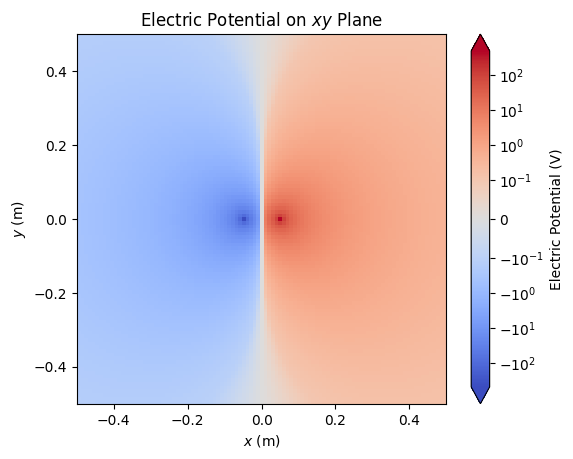

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

q1 = -1
q2 = 1
pos_1 = [-0.05, 0]
pos_2 = [0.05, 0]

x = np.linspace(-0.5, 0.5, 101)
y = np.linspace(-0.5, 0.5, 101)
X, Y = np.meshgrid(x, y)

# ignoring the constant q/(4*pi*epsilon_0)
def potential(x, y):
  r_1 = np.sqrt((x + 0.05)**2 + y**2)
  r_2 = np.sqrt((x - 0.05)**2 + y**2)
  return (-1 / r_1 + 1 / r_2)

phi = potential(X, Y)
phi_max_index = np.argwhere(phi == phi.max())
phi_min_index = np.argwhere(phi == phi.min())
# avoid divergence at the location of the charge
phi[phi_max_index[0][0], phi_max_index[0][1]] = 500
phi[phi_min_index[0][0], phi_min_index[0][1]] = -500
plt.imshow(phi, cmap="coolwarm", origin="lower", extent=(-0.5, 0.5, -0.5, 0.5), norm=colors.SymLogNorm(linthresh=0.1))
plt.colorbar(label='Electric Potential (V)', extend="both")
plt.title('Electric Potential on $xy$ Plane')
plt.xlabel("$x$ (m)")
plt.ylabel("$y$ (m)")

# cs = plt.contour(X, Y, phi, [-10, -5, -1, -0.5, -0.2, 0, 0.2, 0.5, 1, 5, 10], colors="black")
# plt.clabel(cs, [-0.5, 0, 0.2, 0.5, 1, 5, 10])

plt.show()

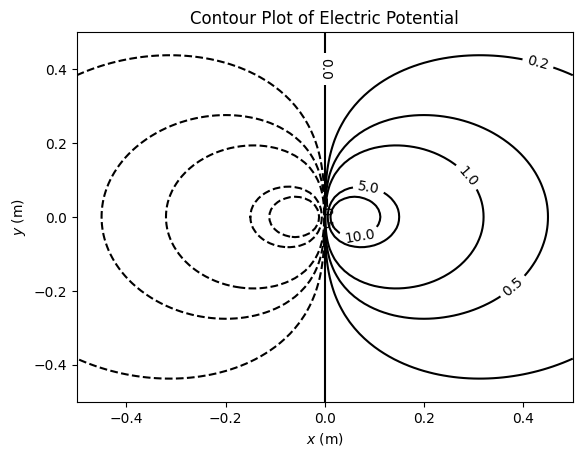

In [235]:
x = np.linspace(-0.5, 0.5, 101)
y = np.linspace(-0.5, 0.5, 101)
X, Y = np.meshgrid(x, y)

# ignoring the constant q/(4*pi*epsilon_0)
def potential(x, y):
  r_1 = np.sqrt((x + 0.05)**2 + y**2)
  r_2 = np.sqrt((x - 0.05)**2 + y**2)
  return (-1 / r_1 + 1 / r_2)

phi = potential(X, Y)
phi_max_index = np.argwhere(phi == phi.max())
phi_min_index = np.argwhere(phi == phi.min())
# avoid divergence at the location of the charge
phi[phi_max_index[0][0], phi_max_index[0][1]] = 500
phi[phi_min_index[0][0], phi_min_index[0][1]] = -500

cs = plt.contour(X, Y, phi, [-10, -5, -1, -0.5, -0.2, 0, 0.2, 0.5, 1, 5, 10], colors="black")
plt.clabel(cs, [-0.5, 0, 0.2, 0.5, 1, 5, 10])
plt.title('Contour Plot of Electric Potential')
plt.xlabel("$x$ (m)")
plt.ylabel("$y$ (m)")

plt.show()

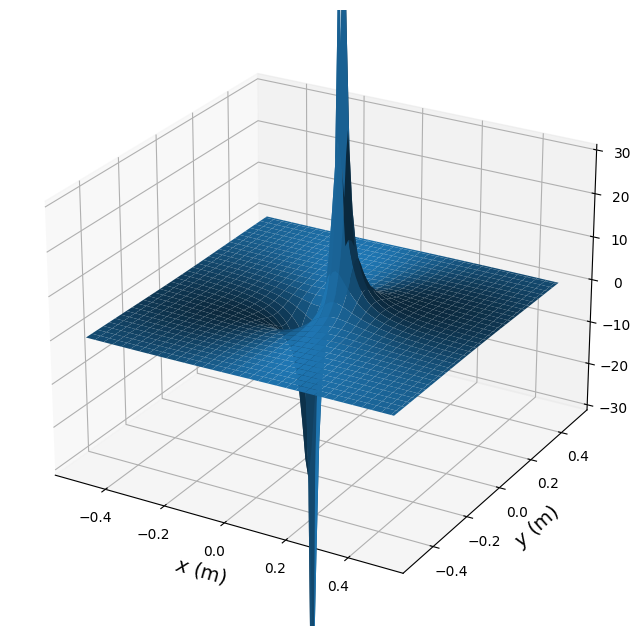

In [178]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-0.5, 0.5, 101)
y = np.linspace(-0.5, 0.5, 101)
X, Y = np.meshgrid(x, y)

# ignoring the constant q/(4*pi*epsilon_0)
def potential(x, y):
  r_1 = np.sqrt((x + 0.05)**2 + y**2)
  r_2 = np.sqrt((x - 0.05)**2 + y**2)
  return (-1 / r_1 + 1 / r_2)

phi = potential(X, Y)
phi_max_index = np.argwhere(phi == phi.max())
phi_min_index = np.argwhere(phi == phi.min())
phi[phi_max_index[0][0], phi_max_index[0][1]] = 500
phi[phi_min_index[0][0], phi_min_index[0][1]] = -500

fig = plt.figure(dpi=100, figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$x$ (m)', fontsize=14)
ax.set_ylabel('$y$ (m)', fontsize=14)
ax.set_zlabel('V', fontsize=14)
ax.set_zlim(-30, 30)
ax.plot_surface(X, Y, phi)
ax.view_init(25,-60)
plt.show()

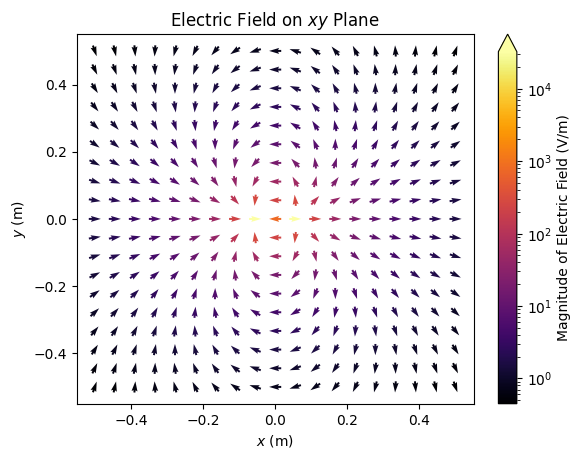

In [98]:
import matplotlib.colors as colors

def normalized_electric_field(x, y):
  r_1 = np.sqrt((x + 0.05)**2 + y**2)
  r_2 = np.sqrt((x - 0.05)**2 + y**2)
  E_x1 = -(x + 0.05) / r_1**3
  E_x2 = (x - 0.05) / r_2**3
  E_x = E_x1 + E_x2
  E_y1 = -y / r_1**3
  E_y2 = y / r_2**3
  E_y = E_y1 + E_y2
  E = np.sqrt(E_x**2 + E_y**2)
  normal_E_x = E_x / E
  normal_E_y = E_y / E
  return normal_E_x, normal_E_y, E

x = np.linspace(-0.5, 0.5, 19)
y = np.linspace(-0.5, 0.5, 19)
X, Y = np.meshgrid(x, y)

normal_E_x, normal_E_y, E = normalized_electric_field(X, Y)
plt.quiver(x, y, normal_E_x, normal_E_y, E, angles = "xy", scale_units='xy',
           cmap="inferno", pivot="middle", norm=colors.LogNorm(), width=0.005)
plt.colorbar(label='Magnitude of Electric Field (V/m)', extend="max")
plt.title('Electric Field on $xy$ Plane')
plt.xlabel("$x$ (m)")
plt.ylabel("$y$ (m)")
# plt.streamplot(x, y, normal_E_x, normal_E_y, density=1.3)

plt.show()

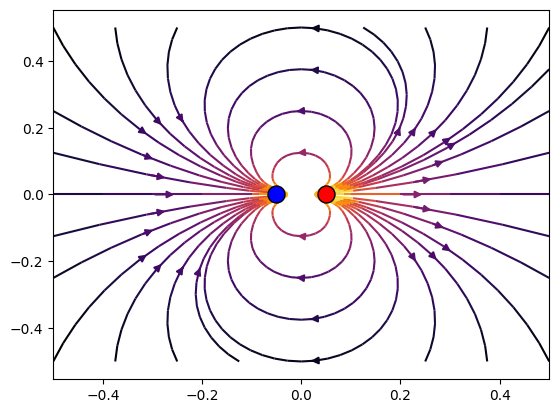

In [120]:
def electric_field(x, y):
  r_1 = np.sqrt((x + 0.05)**2 + y**2)
  r_2 = np.sqrt((x - 0.05)**2 + y**2)
  E_x1 = -(x + 0.05) / r_1**3
  E_x2 = (x - 0.05) / r_2**3
  E_x = E_x1 + E_x2
  E_y1 = -y / r_1**3
  E_y2 = y / r_2**3
  E_y = E_y1 + E_y2
  E = np.sqrt(E_x**2 + E_y**2)
  normal_E_x = E_x / E
  normal_E_y = E_y / E
  E = np.sqrt(E_x**2 + E_y**2)
  return E_x, E_y, normal_E_x, normal_E_y, E

x = np.linspace(-0.5, 0.5, 19)
y = np.linspace(-0.5, 0.5, 19)
X, Y = np.meshgrid(x, y)

# phi = potential(X, Y)
# phi_max_index = np.argwhere(phi == phi.max())
# phi_min_index = np.argwhere(phi == phi.min())
# # avoid divergence at the location of the charge
# phi[phi_max_index[0][0], phi_max_index[0][1]] = 500
# phi[phi_min_index[0][0], phi_min_index[0][1]] = -500
# plt.imshow(phi, cmap="coolwarm", origin="lower", extent=(-0.5, 0.5, -0.5, 0.5), norm=colors.SymLogNorm(linthresh=0.1))
# plt.colorbar(label='Electric Potential (V)', extend="both")
# plt.title('Electric Potential on $xy$ Plane')
# plt.xlabel("$x$ (m)")
# plt.ylabel("$y$ (m)")

E_x, E_y, normal_E_x, normal_E_y, E = electric_field(X, Y)
# plt.quiver(x, y, normal_E_x, normal_E_y, angles = "xy", scale_units='xy')
plt.streamplot(x, y, normal_E_x, normal_E_y, density=0.3, color=np.log(E), cmap="inferno", broken_streamlines=False, zorder=1)
plt.scatter(-0.05, 0, s=150, c="blue", edgecolors="black", zorder=2)
plt.scatter(0.05, 0, s=150, c="red", edgecolors="black", zorder=2)

plt.show()

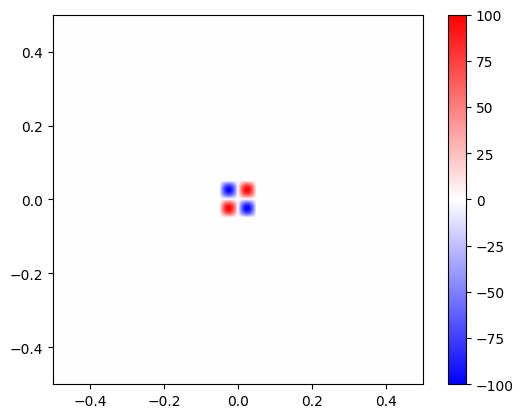

In [65]:
x = np.linspace(-0.5, 0.5, 1001)
y = np.linspace(-0.5, 0.5, 1001)

def charge_density(x, y):
  L = 0.1
  q_0 = 100
  if x < -L/2 or x > L/2 or y < -L/2 or y > L/2:
    return 0
  else:
    return q_0 * np.sin(2 * np.pi * x / L) * np.sin(2 * np.pi * y / L)

sigma = []
for j in y:
  for i in x:
    sigma.append(charge_density(i, j))
sigma = np.reshape(sigma, (len(x), len(x)))
plt.imshow(sigma, origin="lower", extent=(-0.5, 0.5, -0.5, 0.5), cmap="bwr")
plt.colorbar()

plt.show()

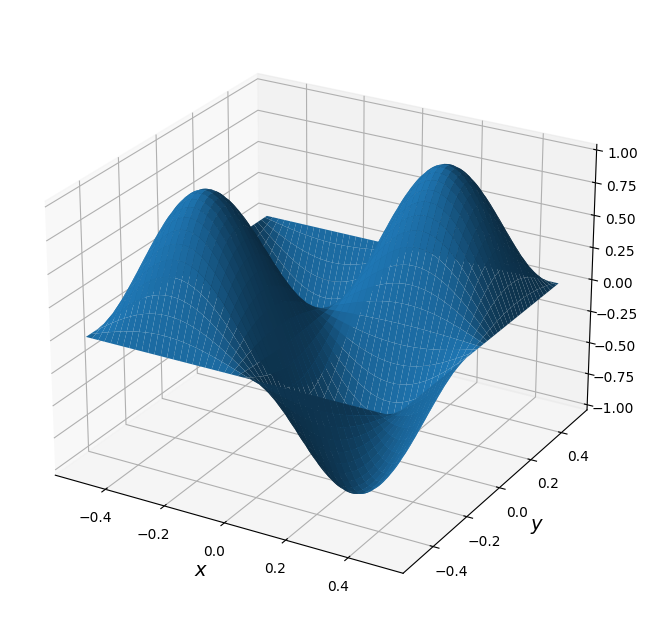

In [28]:
scaling_factor = 10

x = np.linspace(-0.5, 0.5, 1001)
y = np.linspace(-0.5, 0.5, 1001)
X, Y = np.meshgrid(x, y)

def charge_density(x, y):
  L = 0.1 * scaling_factor
  q_0 = 100
  if x < -L/2 or x > L/2 or y < -L/2 or y > L/2:
    return 0
  else:
    return np.sin(2 * np.pi * x / L) * np.sin(2 * np.pi * y / L)

sigma = []
for j in y:
  for i in x:
    sigma.append(charge_density(i, j))
sigma = np.reshape(sigma, (len(x), len(x)))

fig = plt.figure(dpi=100, figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$y$', fontsize=14)
ax.set_zlim(-1, 1)
ax.plot_surface(X, Y, sigma)
ax.view_init(25,-60)
plt.show()

<ipython-input-48-87dfd3e237fd>:44: RuntimeWarning: invalid value encountered in divide
  norm_Ex = Ex / np.hypot(Ex, Ey)
<ipython-input-48-87dfd3e237fd>:45: RuntimeWarning: invalid value encountered in divide
  norm_Ey = Ey / np.hypot(Ex, Ey)


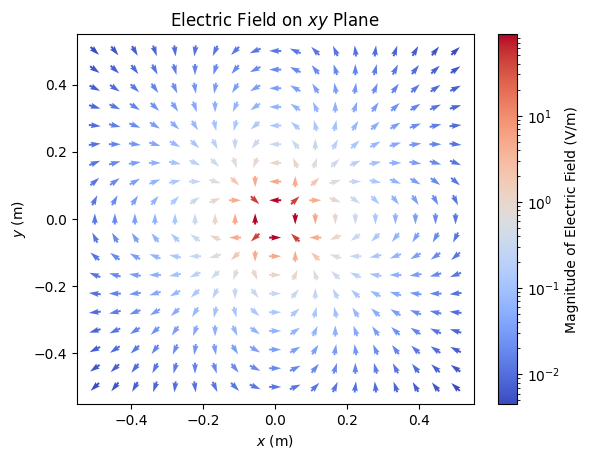

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.integrate import nquad
from numba import njit


# Constants
L = 0.1  # 10 cm converted to meters
q0 = 100  # Charge density in C/m^2

# Charge density function
@njit
def sigma(x, y):
    return q0 * np.sin(2 * np.pi * x / L) * np.sin(2 * np.pi * y / L)

# Electric potential function
def electric_potential(x, y):
    def integrand(x_, y_):
      return sigma(x_, y_) / np.sqrt((x - x_)**2 + (y - y_)**2)
    result, _ = nquad(integrand, [[-L/2, L/2], [-L/2, L/2]])
    return result

# Electric field components
def electric_field_x(x, y, h=1e-6):
    return -(electric_potential(x + h, y) - electric_potential(x - h, y)) / (2 * h)

def electric_field_y(x, y, h=1e-6):
    return -(electric_potential(x, y + h) - electric_potential(x, y - h)) / (2 * h)

# Create a grid of points
x_range = np.linspace(-0.5, 0.5, 19)
y_range = np.linspace(-0.5, 0.5, 19)

# Calculate electric field at each point on the grid
Ex = []
Ey = []
for j in y_range:
  for i in x_range:
    Ex.append(electric_field_x(i, j))
    Ey.append(electric_field_y(i, j))
Ex = np.reshape(Ex, (len(x_range), len(x_range)))
Ey = np.reshape(Ey, (len(x_range), len(x_range)))
norm_Ex = Ex / np.hypot(Ex, Ey)
norm_Ey = Ey / np.hypot(Ex, Ey)
E = np.sqrt(Ex**2 + Ey**2)

# Plot the electric field vectors
plt.quiver(x_range, y_range, norm_Ex, norm_Ey, E, angles = "xy", scale_units='xy',
           cmap="coolwarm", pivot="middle", norm=colors.LogNorm(), width=0.005)
plt.colorbar(label='Magnitude of Electric Field (V/m)')
plt.title('Electric Field on $xy$ Plane')
plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')

plt.show()

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

Ex = np.loadtxt("Ex.txt")
Ey = np.loadtxt("Ey.txt")
norm_Ex = np.loadtxt("norm_Ex.txt")
norm_Ey = np.loadtxt("norm_Ey.txt")
E = np.loadtxt("E.txt")

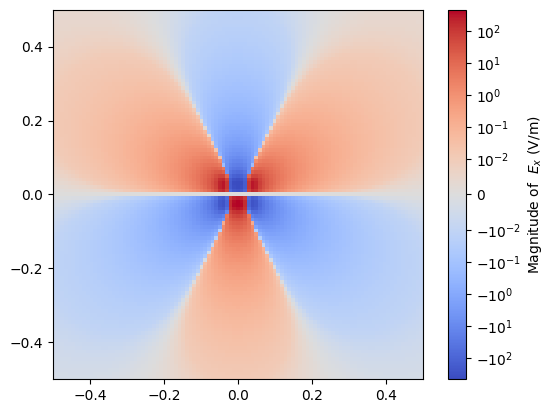

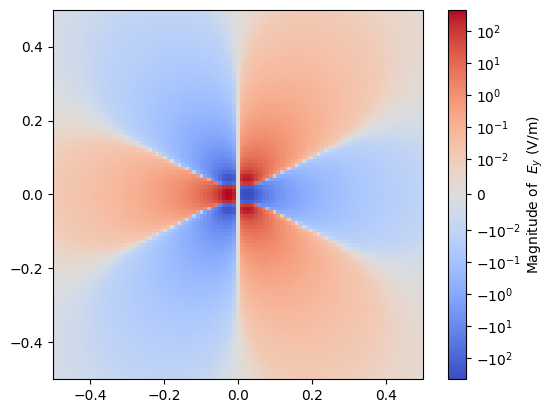

In [80]:
plt.imshow(Ex, cmap="coolwarm", origin="lower", extent=(-0.5, 0.5, -0.5, 0.5), norm=colors.SymLogNorm(linthresh=0.01))
plt.colorbar(label='Magnitude of  $E_x$ (V/m)')
plt.show()

plt.imshow(Ey, cmap="coolwarm", origin="lower", extent=(-0.5, 0.5, -0.5, 0.5), norm=colors.SymLogNorm(linthresh=0.01))
plt.colorbar(label='Magnitude of  $E_y$ (V/m)')
plt.show()


Text(0, 0.5, '$y$ (m)')

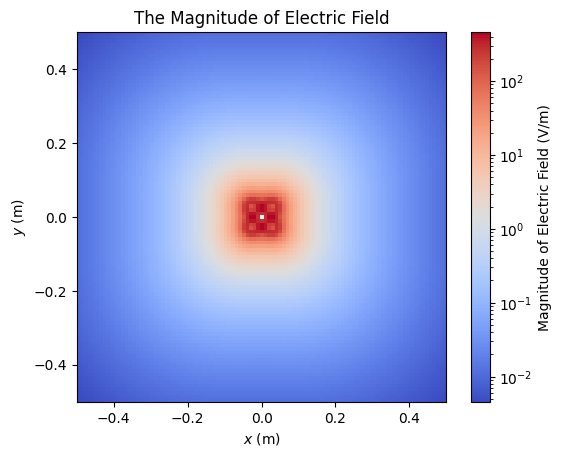

In [88]:
plt.imshow(E, cmap="coolwarm", origin="lower", extent=(-0.5, 0.5, -0.5, 0.5), norm=colors.LogNorm())
plt.colorbar(label='Magnitude of Electric Field (V/m)')
plt.title('The Magnitude of Electric Field')
plt.xlabel("$x$ (m)")
plt.ylabel("$y$ (m)")

<ipython-input-126-442b7896dfd2>:4: RuntimeWarning: divide by zero encountered in log
  plt.streamplot(x_range, y_range, norm_Ex, norm_Ey, color=np.log(E), cmap="autumn", density=0.3, broken_streamlines=False)


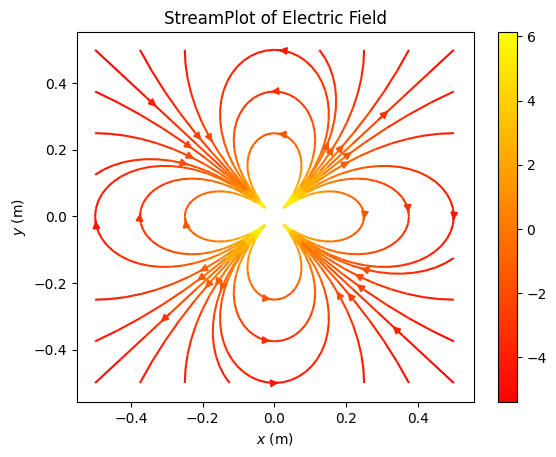

In [126]:
x_range = np.linspace(-0.5, 0.5, 101)
y_range = np.linspace(-0.5, 0.5, 101)

plt.streamplot(x_range, y_range, norm_Ex, norm_Ey, color=np.log(E), cmap="autumn", density=0.3, broken_streamlines=False)
plt.colorbar()
plt.title('StreamPlot of Electric Field')
plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')

plt.show()

<ipython-input-125-453421b33a40>:3: RuntimeWarning: divide by zero encountered in log
  plt.streamplot(x_range, y_range, norm_Ex, norm_Ey, color=np.log(E), cmap="autumn", density=0.3, broken_streamlines=False)


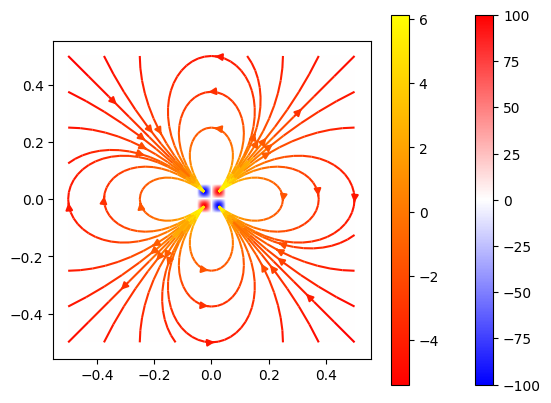

In [125]:
plt.imshow(sigma, origin="lower", extent=(-0.5, 0.5, -0.5, 0.5), cmap="bwr")
plt.colorbar()
plt.streamplot(x_range, y_range, norm_Ex, norm_Ey, color=np.log(E), cmap="autumn", density=0.3, broken_streamlines=False)
plt.colorbar()
plt.show()